In [91]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import time

In [92]:
# Load California housing dataset
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = california_housing.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Linear Regression
start_time = time.time()
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_time = time.time() - start_time

# RANSAC Regression
start_time = time.time()
ransac_reg = RANSACRegressor()
ransac_reg.fit(X_train, y_train)
ransac_reg_time = time.time() - start_time

# Ridge Regression
start_time = time.time()
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_reg_time = time.time() - start_time

# Lasso Regression
start_time = time.time()
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_reg_time = time.time() - start_time

# ElasticNet Regression
start_time = time.time()
elasticnet_reg = ElasticNet()
elasticnet_reg.fit(X_train, y_train)
elasticnet_reg_time = time.time() - start_time

In [94]:

# Evaluate performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

linear_reg_mse, linear_reg_r2 = evaluate_model(linear_reg, X_test, y_test)
ransac_reg_mse, ransac_reg_r2 = evaluate_model(ransac_reg, X_test, y_test)
ridge_reg_mse, ridge_reg_r2 = evaluate_model(ridge_reg, X_test, y_test)
lasso_reg_mse, lasso_reg_r2 = evaluate_model(lasso_reg, X_test, y_test)
elasticnet_reg_mse, elasticnet_reg_r2 = evaluate_model(elasticnet_reg, X_test, y_test)

In [95]:

# Print results
print("Mean Squared Errors\n--------------------------")
print("Linear Regression MSE:", linear_reg_mse)
print("RANSAC Regression MSE:", ransac_reg_mse)
print("Ridge Regression MSE:", ridge_reg_mse)
print("Lasso Regression MSE:", lasso_reg_mse)
print("ElasticNet Regression MSE:", elasticnet_reg_mse)

print("\nR-squared Score\n--------------------------")
print("Linear Regression R2 Score:", linear_reg_r2)
print("RANSAC Regression R2 Score:", ransac_reg_r2)
print("Ridge Regression R2 Score:", ridge_reg_r2)
print("Lasso Regression R2 Score:", lasso_reg_r2)
print("ElasticNet Regression R2 Score:", elasticnet_reg_r2)

print("\nTraining Time\n--------------------------")
print("Linear Regression Time:", linear_reg_time)
print("RANSAC Regression Time:", ransac_reg_time)
print("Ridge Regression Time:", ridge_reg_time)
print("Lasso Regression Time:", lasso_reg_time)
print("ElasticNet Regression Time:", elasticnet_reg_time)


Mean Squared Errors
--------------------------
Linear Regression MSE: 0.555891598695244
RANSAC Regression MSE: 0.9713565431329947
Ridge Regression MSE: 0.5558034669932209
Lasso Regression MSE: 0.9380337514945427
ElasticNet Regression MSE: 0.7645556403971131

R-squared Score
--------------------------
Linear Regression R2 Score: 0.5757877060324511
RANSAC Regression R2 Score: 0.25873787553184413
Ridge Regression R2 Score: 0.5758549611440127
Lasso Regression R2 Score: 0.2841671821008396
ElasticNet Regression R2 Score: 0.41655189098028245

Training Time
--------------------------
Linear Regression Time: 0.045546531677246094
RANSAC Regression Time: 0.20639872550964355
Ridge Regression Time: 0.016172170639038086
Lasso Regression Time: 0.01494741439819336
ElasticNet Regression Time: 0.008494853973388672


In [96]:
import matplotlib.pyplot as plt

# Calculate MSE, R2, and time for each model
models = ['Linear Regression', 'RANSAC Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression']
mse_scores = [linear_reg_mse, ransac_reg_mse, ridge_reg_mse, lasso_reg_mse, elasticnet_reg_mse]
r2_scores = [linear_reg_r2, ransac_reg_r2, ridge_reg_r2, lasso_reg_r2, elasticnet_reg_r2]
times = [linear_reg_time, ransac_reg_time, ridge_reg_time, lasso_reg_time, elasticnet_reg_time]

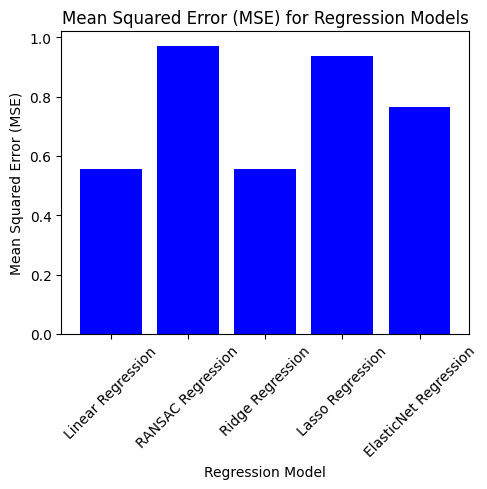

In [97]:

# Plot MSE
plt.figure(figsize=(5, 5))
plt.bar(models, mse_scores, color='blue')
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) for Regression Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

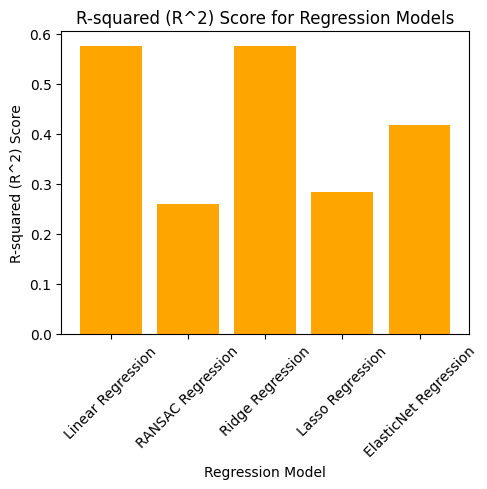

In [98]:
# Plot R2
plt.figure(figsize=(5, 5))
plt.bar(models, r2_scores, color='orange')
plt.xlabel('Regression Model')
plt.ylabel('R-squared (R^2) Score')
plt.title('R-squared (R^2) Score for Regression Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

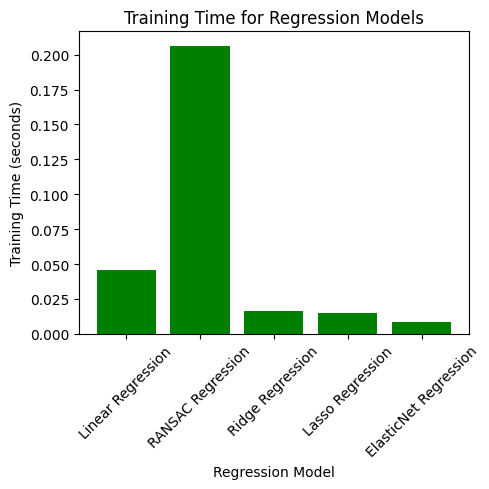

In [99]:
# Plot Time
plt.figure(figsize=(5, 5))
plt.bar(models, times, color='green')
plt.xlabel('Regression Model')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time for Regression Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [111]:
from sklearn.kernel_ridge import KernelRidge

# Create and fit Kernel Ridge Regression model
krr_model = KernelRidge(kernel='rbf')

# Fit the polynomial regression model
start_time = time.time()
krr_model.fit(X_train, y_train)
end_time = time.time()
poly_reg_time = end_time - start_time

# Predict on the test set
y_pred_poly = krr_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) score
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("MSE of Kernel Ridge Regression with RBF Kernel:", mse_poly)
print("R2 score of Kernel Ridge Regression with RBF Kernel:", r2_poly)
print("Training Time  of Kernel Ridge Regression with RBF Kernel:", poly_reg_time)

MSE of Kernel Ridge Regression with RBF Kernel: 3.5817028817952665
R2 score of Kernel Ridge Regression with RBF Kernel: -1.7332710178797495
Training Time  of Kernel Ridge Regression with RBF Kernel: 200.70035576820374


In [140]:
alphas = [0.001, 0.1, 1, 10, 100]
times = []
mses = []
r2s = []
for alp in alphas:
    start_time = time.time()
    lasso_reg = Lasso(alpha = alp)
    lasso_reg.fit(X_train, y_train)
    lasso_reg_time = time.time() - start_time
    times.append(lasso_reg_time)
    mse_lasso, r2_lasso = evaluate_model(lasso_reg, X_test, y_test)
    mses.append(mse_lasso)
    r2s.append(r2_lasso)

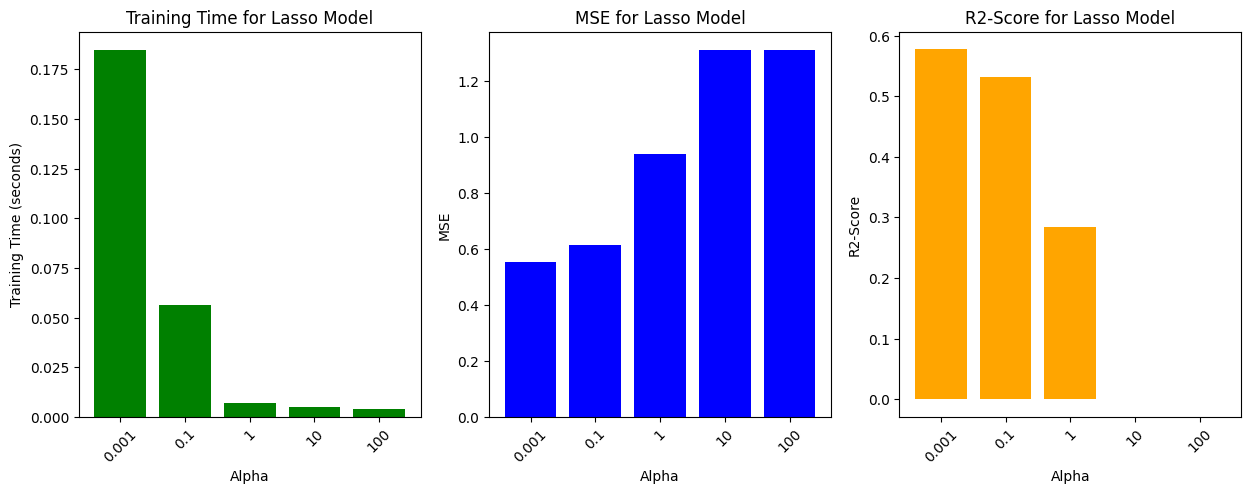

In [145]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.bar(['0.001','0.1','1','10','100'], times, color='green')
plt.xlabel('Alpha')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time for Lasso Model')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
plt.bar(['0.001','0.1','1','10','100'], mses, color='blue')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Lasso Model')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
plt.bar(['0.001','0.1','1','10','100'], r2s, color='orange')
plt.xlabel('Alpha')
plt.ylabel('R2-Score')
plt.title('R2-Score for Lasso Model')
plt.xticks(rotation=45)
plt.show()

In [131]:
alphas = [0.001, 0.1, 1, 10, 100]
times = []
mses = []
r2s = []
for alp in alphas:
    start_time = time.time()
    ridge_reg = Ridge(alpha = alp)
    ridge_reg.fit(X_train, y_train)
    ridge_reg_time = time.time() - start_time
    times.append(ridge_reg_time)
    mse_ridge, r2_ridge = evaluate_model(ridge_reg, X_test, y_test)
    mses.append(mse_ridge)
    r2s.append(r2_ridge)

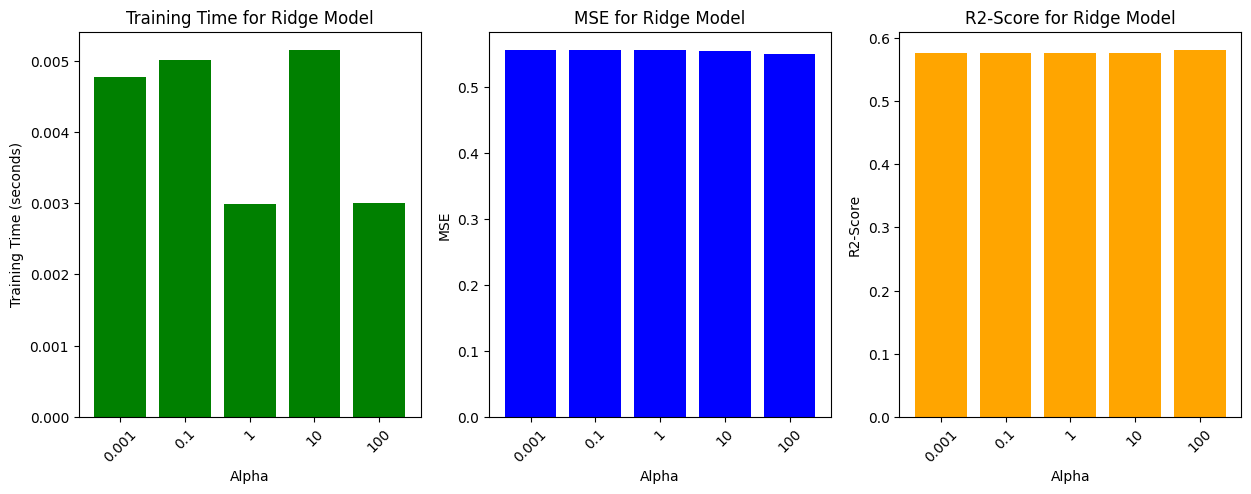

In [135]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.bar(['0.001','0.1','1','10','100'], times, color='green')
plt.xlabel('Alpha')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time for Ridge Model')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
plt.bar(['0.001','0.1','1','10','100'], mses, color='blue')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Ridge Model')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
plt.bar(['0.001','0.1','1','10','100'], r2s, color='orange')
plt.xlabel('Alpha')
plt.ylabel('R2-Score')
plt.title('R2-Score for Ridge Model')
plt.xticks(rotation=45)
plt.show()

In [149]:
min_samples = [10,50,100,200,500]
times = []
mses = []
r2s = []
for minsamp in min_samples:
    start_time = time.time()
    ransac_reg = RANSACRegressor(min_samples = minsamp)
    ransac_reg.fit(X_train, y_train)
    ransac_reg_time = time.time() - start_time
    times.append(ransac_reg_time)
    mse_ransac, r2_ransac = evaluate_model(ransac_reg, X_test, y_test)
    mses.append(mse_ransac)
    r2s.append(r2_ransac)


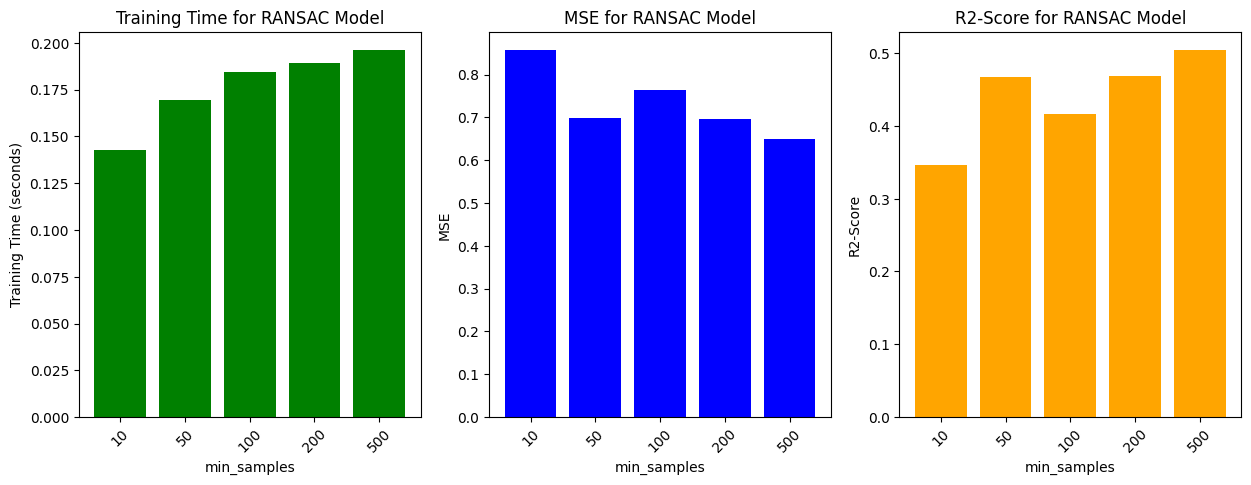

In [150]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.bar(['10','50','100','200','500'], times, color='green')
plt.xlabel('min_samples')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time for RANSAC Model')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
plt.bar(['10','50','100','200','500'], mses, color='blue')
plt.xlabel('min_samples')
plt.ylabel('MSE')
plt.title('MSE for RANSAC Model')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
plt.bar(['10','50','100','200','500'], r2s, color='orange')
plt.xlabel('min_samples')
plt.ylabel('R2-Score')
plt.title('R2-Score for RANSAC Model')
plt.xticks(rotation=45)
plt.show()

In [152]:
l1_ratio = [0.1,0.25,0.5,0.75,1]
times = []
mses = []
r2s = []
for l1 in l1_ratio:
    start_time = time.time()
    elasticnet_reg = ElasticNet(l1_ratio = l1)
    elasticnet_reg.fit(X_train, y_train)
    elasticnet_reg_time = time.time() - start_time
    times.append(elasticnet_reg_time)
    mse_elasticnet, r2_elasticnet = evaluate_model(elasticnet_reg, X_test, y_test)
    mses.append(mse_elasticnet)
    r2s.append(r2_elasticnet)

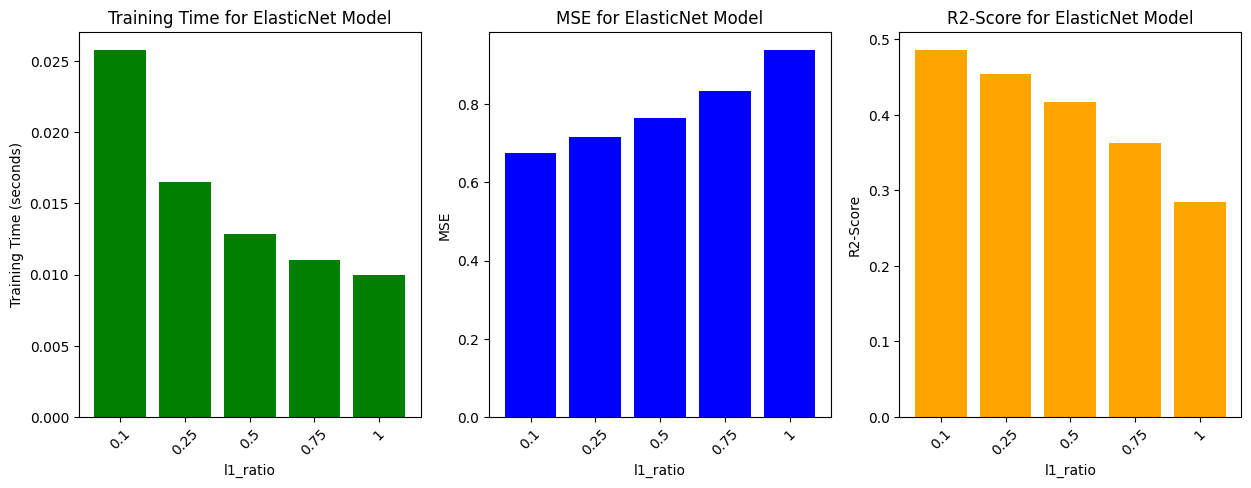

In [154]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.bar(['0.1','0.25','0.5','0.75','1'], times, color='green')
plt.xlabel('l1_ratio')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time for ElasticNet Model')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
plt.bar(['0.1','0.25','0.5','0.75','1'], mses, color='blue')
plt.xlabel('l1_ratio')
plt.ylabel('MSE')
plt.title('MSE for ElasticNet Model')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
plt.bar(['0.1','0.25','0.5','0.75','1'], r2s, color='orange')
plt.xlabel('l1_ratio')
plt.ylabel('R2-Score')
plt.title('R2-Score for ElasticNet Model')
plt.xticks(rotation=45)
plt.show()

In [156]:
alphas = [0.001, 0.1, 1, 10, 100]
times = []
mses = []
r2s = []
for alp in alphas:
    start_time = time.time()
    kernelridge_reg = KernelRidge(kernel='rbf', alpha = alp)
    kernelridge_reg.fit(X_train, y_train)
    kernelridge_reg_time = time.time() - start_time
    times.append(kernelridge_reg_time)
    mse_kernelridge, r2_kernelridge = evaluate_model(kernelridge_reg, X_test, y_test)
    mses.append(mse_kernelridge)
    r2s.append(r2_kernelridge)

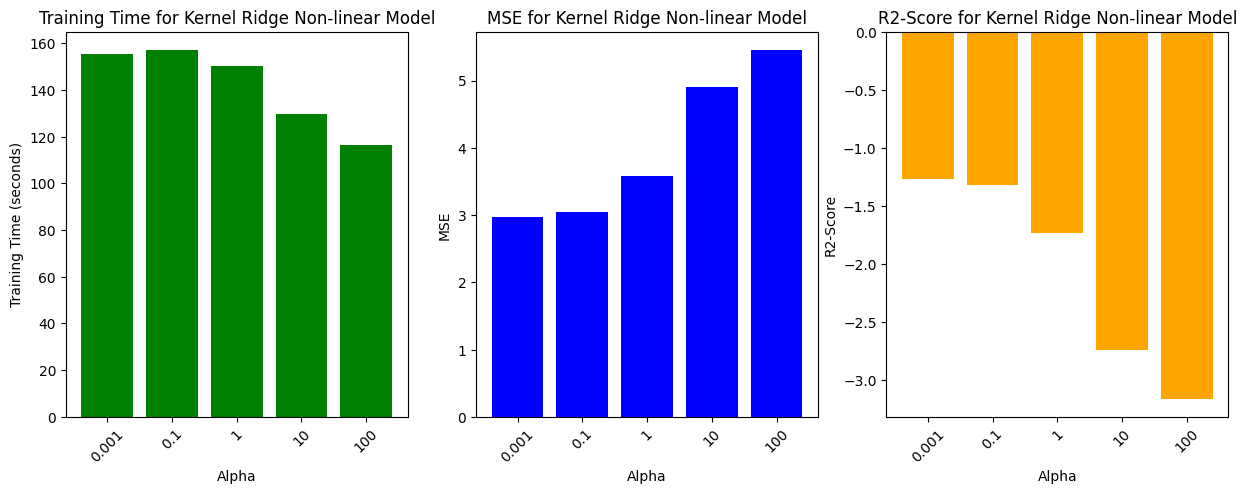

In [158]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.bar(['0.001', '0.1', '1', '10', '100'], times, color='green')
plt.xlabel('Alpha')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time for Kernel Ridge Non-linear Model')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
plt.bar(['0.001', '0.1', '1', '10', '100'], mses, color='blue')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Kernel Ridge Non-linear Model')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
plt.bar(['0.001', '0.1', '1', '10', '100'], r2s, color='orange')
plt.xlabel('Alpha')
plt.ylabel('R2-Score')
plt.title('R2-Score for Kernel Ridge Non-linear Model')
plt.xticks(rotation=45)
plt.show()